In [94]:
#Importing the data and storing it in variable df_all

import pandas as pd
from sklearn.model_selection import train_test_split
df_all = pd.read_csv("crox-early-data.csv")

df_all = df_all.dropna()

X = df_all.drop(columns=['Close Higher'])
y = df_all['Close Higher']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=451)
X_train.head()

,Date,Open,Close,Google Trends,Previous GT,Volume,TTM EPS,TTM PE
21,3/20/2024,133.04,139.99,54,48.0,2432394,12.03,11.64
47,2/12/2024,108.14,110.08,39,38.0,1554139,12.10,9.10
30,3/7/2024,120.24,124.00,52,48.0,1152647,12.03,10.31
32,3/5/2024,123.14,122.02,54,61.0,1171398,12.03,10.14
4,4/15/2024,126.96,123.36,46,42.0,1090261,12.03,10.25


In [95]:
df_all.groupby("Close Higher").mean(numeric_only=True)

,Open,Close,Google Trends,Previous GT,Volume,TTM EPS,TTM PE
Close Higher,,,,,,,
0,122.017931,120.197931,45.620690,45.793103,1.201881e+06,12.054138,9.973793
1,120.213030,122.064848,45.424242,44.636364,1.317298e+06,12.053333,10.129394


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

"""def prepare_data(df):
  df = df_all.drop(["loan_grade"], axis = 1)
  df = df.dropna()
  le.fit(df_all["person_home_ownership"])
  df["person_home_ownership"] = le.transform(df["person_home_ownership"])
  le.fit(df_all["loan_intent"])
  df["loan_intent"] = le.transform(df["loan_intent"])
  y = df["loan_status"]
  df = df.drop(["loan_status"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(df_all)
df_all = df_all.dropna()"""

In [97]:
#Choosing features
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

cols = ["Previous GT", "TTM PE"]

LR.fit(X_train[cols], y_train)
LR.score(X_train[cols], y_train)
LR.coef_[0]

array([-0.05606773,  0.38771535])

In [98]:
def linear_score(w, x0, x1):
    return w[0]*x0 + w[1]*x1

In [99]:
#Predict makes binary predictions for data using a supplied score function with weights w and a supplied threshold. Taken from lecture notes from week 2.
#We begin with a 0 threshold but later on test others to find an optimal threshold

t = 0

def predict(score_fun, w, threshold, df):
    """
    make binary predictions for data df using a supplied score function with weights w and supplied threshold. 
    """
    scores = score_fun(w, df["Previous GT"], df["TTM PE"])
    return 1*(scores > threshold)

df_all["decision"] = predict(linear_score, LR.coef_[0], t, df_all)
(df_all["decision"] == df_all["Close Higher"]).mean()

0.532258064516129

(1.0, 0.6129032258064516)

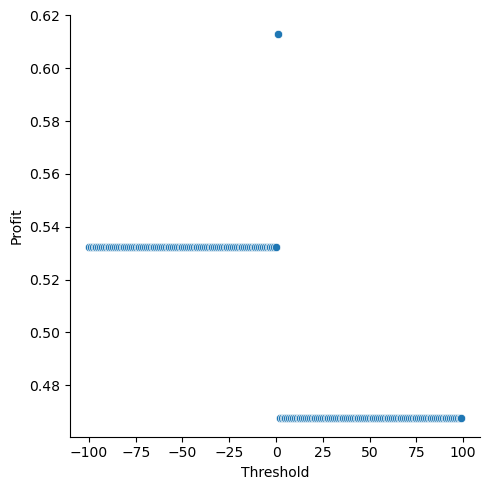

In [100]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


iterations = 200
predictions = []
for i in range(iterations):
    threshold = (-iterations/2)+(i)
    df_all["decision"] = predict(linear_score, LR.coef_[0], threshold, df_all)
    predictions.append((threshold, (df_all["decision"] == df_all["Close Higher"]).mean()))


predictions_df = pd.DataFrame(data=predictions)
predictions_df.columns =['Threshold', 'Profit']

sns.relplot(data=predictions_df, x="Threshold", y="Profit")
predictions_df['Threshold'][predictions_df['Profit'].idxmax()], predictions_df['Profit'].max()

In [101]:
t = 1.0

df_all["decision"] = predict(linear_score, LR.coef_[0], t, df_all)
(df_all["decision"] == df_all["Close Higher"]).mean()

0.6129032258064516